---
# DS3000A - DS9000A Final Exam

## Student ID #: 251216918

## Grade: __ / 100 + 10 Bonus

## General Comments

-   This exam integrates knowledge and skills acquired in the whole term. You are allowed to use any document and source on your computer and the internet, but you are NOT allowed to share documents, post questions to online forums, or communicate in any way with people inside or outside the class. 

-   Having any document sharing or communication tool (e.g. Discord, Teams, Outlook, Google Drive etc.), either web-based or app-based, open on your laptop (or running in the background) is considered act of cheating and you will receive 0 pts for the exam.

-   To finish the midterm in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

-   You need to submit your final notebook by 1:00PM on OWL to the Test and Quizzes section, this is the same place where you downloaded the empty notebook and data. Late submission will be scored with 0 pts. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

-   Some questions demand a **written answer** - answer these in full English sentences in markdown cells. 

-   For your figures, ensure that all axes are labeled in an informative way. There might be a situation where you should limit the x-axis and/or the y-axis to zoom-in for interpretation.

-   Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting to OWL. 

## Additional Guidance

-   If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to those assumptions.
-   If you have no clue how to approach a question, skip it and move on. Revisit the skipped one(s) after you are done with the rest.

---
## Preliminaries
Feel free to add stuff.

---
## Question 1 - <span style="color:green">[60]</span> - Model Selection 
You are going to work on a dataset listing the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model (amongst four candidates) that can best predict a player's monetary value. The dataset has the following attributes:
- `Age`: Player age in years
- `Nationality`: Players nationality
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Club`: Player home soccer club
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

In [125]:
df = pd.read_csv('dataset_1.csv')

In [127]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


- There is not missing values
- **There are so many countrys and clubs, so I will drop them**. 
- The feature **Value** is so large, so i will use log instead

In [128]:
print('Features with null values:\n', df.isnull().sum())

Features with null values:
 Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64


In [129]:
df_mod = df.drop('Nationality', axis= 1)
df_mod = df_mod.drop('Club', axis= 1)
value = np.log(df['Value'])
df_mod['Value'] = value
df_mod.Value = df_mod.Value.astype(int)
df_mod.head(5)

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,86,87,18,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,85,85,17,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,91,91,18,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,86,89,18,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,89,90,18,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


In [130]:
Height = df['Height']
Weight = df['Weight']
BMI = Weight / ((Height / 100) ** 2)
df['BMI'] = BMI

Q 1.4 - <span style="color:red">[4]</span> - Use `sns.jointplot` to investigate the following relationships and apply proper transformations where needed:
- Value vs. Wage
- Value vs. Overall
- Wage vs. Overall
- Value vs. Potential
- Wage vs. Potential

Note: Where transformation is needed, use `sns.jointplot` twice (*i.e.*, before and after transformation).

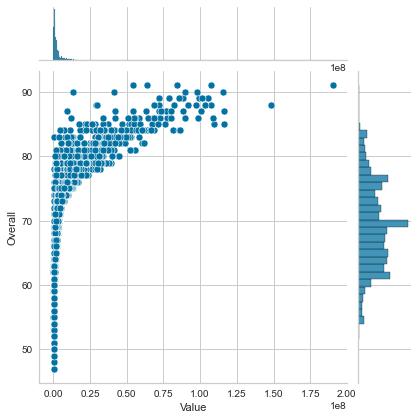

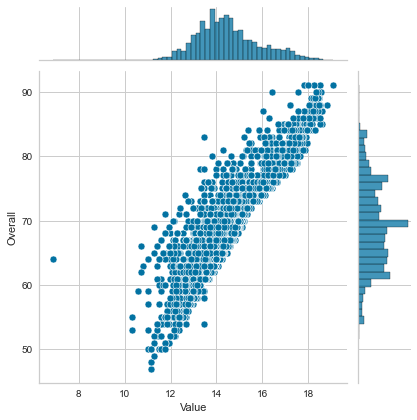

In [132]:
sns.jointplot(data=df, x="Value", y="Overall")
sns.jointplot(data=df, x=value, y="Overall")

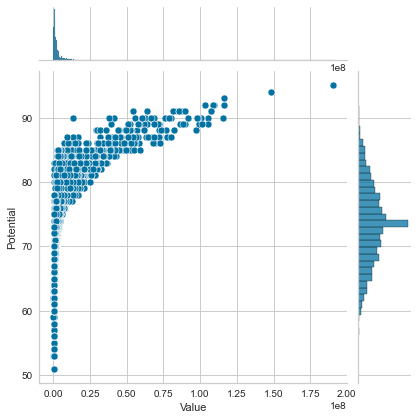

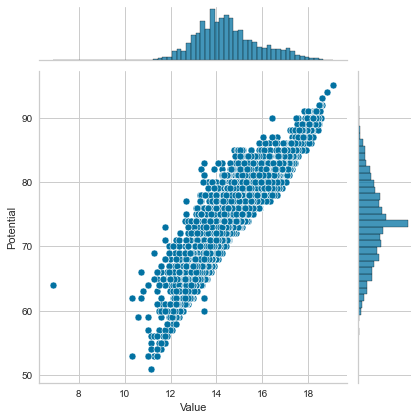

In [134]:
sns.jointplot(data=df, x="Value", y="Potential")
sns.jointplot(data=df, x=value, y="Potential")

Q 1.5 - <span style="color:red">[2]</span> - Output a table reporting in descending format the correlations between the numerical features and target.  

Q 1.6 - <span style="color:red">[6]</span> - Code the following:
-   use pandas `get_dummies` to take care of the categorical variables, if any, <span style="color:red">[2]</span>
-   at this point, before proceeding to the next step, store the dataframe with a unique name because you will need it again in **Question 1.14 and 1.15**. <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to put aside 20% of the data for testing purpose, <span style="color:red">[1]</span>
-   define an RMSE scorer function. <span style="color:red">[2]</span>

Q 1.7 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's linear regression with the default arguments and name it `model1`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model1` and report the cross-validated RMSE of each split as well as their mean and standard deviation <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model1` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

In [138]:
model1 = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model1, Xtrain, ytrain, cv=kf, scoring=make_scorer(rmse))

print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model1  = LinearRegression().fit(Xtrain, ytrain)
print("Training RMSE: %.3f" % rmse(ytrain, model1.predict(Xtrain)))

Loss_Test = rmse(ytest, model1.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

List of CV losses: [0.464 0.392 0.376 0.395 0.376]
Average CV loss: 0.401 +/- 0.032
Training RMSE: 0.399
Generalization RMSE: 0.368


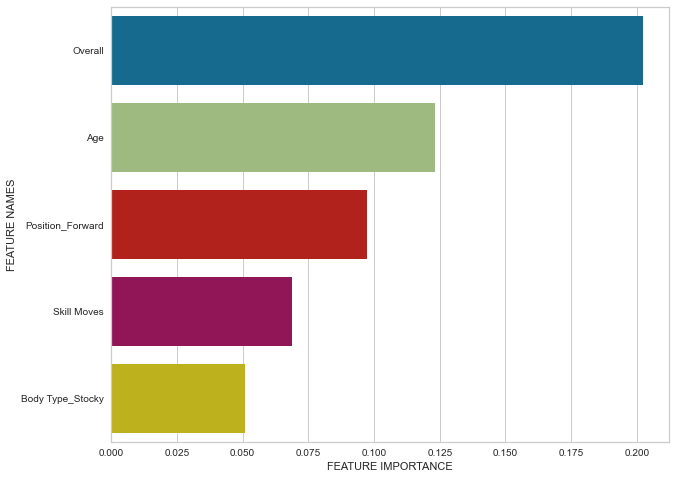

In [139]:
coef = np.abs(model1.coef_)

def plot_feature_importance(importance,names):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    fi_df = fi_df[:5]
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(coef,X.columns.values)

Q 1.8 - <span style="color:red">[5]</span> - Do the following:
-   Bundle the `StandardScaler` with the sklearn's cross-validated ridge linear regression into a `Pipeline` and name it `model2` (for the regressor use the default arguments except `alpha = [1e-10, 1e-5, 1]` and `store_cv_values=True`), <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model2` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   which entry in the `alpha` list did the model select for training? <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model2` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

In [140]:
model2 = Pipeline([
    ('Standardize', StandardScaler()), 
    ('ridge', RidgeCV(alphas = [1e-10, 1e-5, 1], store_cv_values=True))]    
    )

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model2, Xtrain, ytrain, cv=kf, scoring=make_scorer(rmse))
print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model2.fit(Xtrain, ytrain)
print("Training RMSE: %.3f" % rmse(ytrain, model2.predict(Xtrain)))

Loss_Test = rmse(ytest, model2.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

List of CV losses: [0.556 0.404 0.376 0.448 0.377]
Average CV loss: 0.432 +/- 0.067
Training RMSE: 0.413
Generalization RMSE: 0.388


Q 1.9 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's random forest regressor with the default arguments except `n_jobs=-1,` and `random_state=seed` and name it `model3`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model3` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score,  <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   how many trees this forest has? <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

In [143]:
model3.fit(Xtrain, ytrain)
print("Training RMSE: %.3f" % rmse(ytrain, model3.predict(Xtrain)))

Loss_Test = rmse(ytest, model3.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

Training RMSE: 0.103
Generalization RMSE: 0.252


<AxesSubplot:>

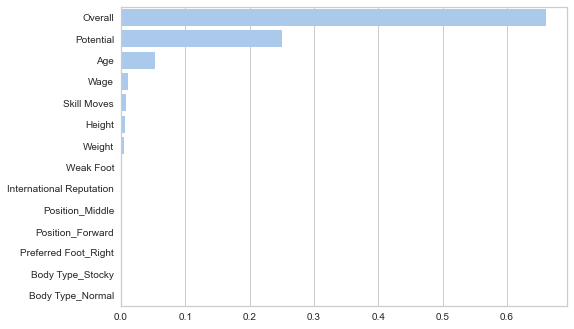

In [145]:
importances = model3.feature_importances_
indices = np.argsort(importances)[::-1] 
sns.barplot(y=[Xtrain.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")

In [146]:
param_grid = dict({
    'max_depth': [50, 100, 150],
    'max_features' : ['None', 'sqrt', 'log2']})


cv_object = StratifiedKFold(n_splits=2)
GridXGB = GridSearchCV(model3, param_grid, cv = cv_object,
                       n_jobs = -1, 
                       refit = False, verbose = 0)

In [148]:
GridXGB.fit(df_50_x, df_50y)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=1220),
             n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150],
                         'max_features': ['None', 'sqrt', 'log2']},
             refit=False)

Q 1.11 - <span style="color:red">[4]</span> - Do the following:
-   Take the random forest again but this time use the best values found in the previous step (again with `n_jobs=-1,` and `random_state=seed`), and name it `model4`, <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model4` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

In [150]:
model4 = RandomForestRegressor(n_jobs=-1, random_state=seed, max_depth=50, max_features='sqrt')

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model3, Xtrain, ytrain, cv=kf, scoring=make_scorer(rmse))
print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model4.fit(Xtrain, ytrain)
print("Training RMSE: %.3f" % rmse(ytrain, model4.predict(Xtrain)))

Loss_Test = rmse(ytest, model4.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

List of CV losses: [0.366 0.256 0.248 0.287 0.235]
Average CV loss: 0.278 +/- 0.047
Training RMSE: 0.120
Generalization RMSE: 0.302


Q 1.12 - <span style="color:red">[1]</span> - Based on your results, what features do you think are the most important ones? Which model do you trust for this purpose and why?

Q 1.13 - <span style="color:red">[1.5]</span> - If you are asked to choose one final model for production, which one would you select? Explain why? Note: To answer this, take computational complexity into account alongside other criteria.

I will choose the random forest regrressor, it has the best performance and lowest cv score.

In [152]:
tSNEmapper = TSNE(n_components=3,               # How many dimensions to use. Never more than 2 or 3
                  init='random',                # First initialization. Sparse matrices need 'random'.  Otherwise use 'pca'
                  perplexity=50.0,              # Read below
                  learning_rate='auto',         # Related to above. Leave to auto
                  verbose=0,                    # Verbosity
                  random_state=seed,              # Random seed
                  n_jobs=-1,                     # Parallel processes
                  n_iter=1000,  
                 )

The t-distribution has heavier tails than the Gaussian distribution, which means that it is more sensitive to outliers and can better capture the structure of the data. This makes t-SNE more effective at preserving the relationships between points in the high-dimensional space when they are mapped to the low-dimensional space.

Q 1.15 - <span style="color:red">[5]</span> - Take the dataframe that you set aside in **Question 1.6** for this question. We want to do a classification with `'International Reputation'` as target class. This is going to be an imbalanced classification but we don't care. We are interested to see if can get a better accuracy score if we do some clustering as a preprocessing step. Do the following:
-   what would be the classification baseline accuracy for this dataframe? <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to set aside 20% of the data as test set, <span style="color:red">[0.5]</span>
-   instantiate a sklearn's stochastic gradient descent classifier with the proper solver for logistic regression and name it `clf`. Use elasticnet regularization with `l1_ratio` of 0.7. Set `max_iter=2000`, `tol=1e-3`, `n_jobs=-1`, `random_state=seed`, <span style="color:red">[2]</span>
-   run 5-split `StratifiedKFold` cross-validation on `clf` and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[1.5]</span>

In [154]:
target = df_copy['International Reputation']
counts= target.value_counts()
counts

1.0    4191
2.0     457
3.0     194
4.0      55
5.0       6
Name: International Reputation, dtype: int64

In [155]:
baseline_accuracy = round(4191/ (4191 + 457 + 194 + 55 + 6), 3)
print("Baseline Accuracy is:", baseline_accuracy)

Baseline Accuracy is: 0.855


Q 1.16 - <span style="color:red">[8]</span> - Do the following:
-   bundle a 50-cluster `K-Means` (as a preprocessing step) and the `clf` into a pipeline. Set `random_state=seed` for `K-Means`, <span style="color:red">[3]</span>
-   run 5-split `StratifiedKFold` cross-validation on the pipeline and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[2]</span>
-   do you find the added preprocessing step effective? why? <span style="color:red">[1]</span>
-   what transformations did the data undergo through this pipeline? <span style="color:red">[2]</span>


The added preprocessing is effective, Because adding k-means can help to reduce the dimensionality of the data, which can make it easier to work with and can also improve the performance of certain machine learning algorithms.

Each cluster is represented by the mean (centroid) of all the points within the cluster.

---
## Question 2 - <span style="color:green">[40]</span> - Clustering 
For this question we use a modified dataset from UCI Machine Learning Datasets. The data contains selling features on a social media platform. Each record has information about the time the information was posted and engagements such as emotion.

Q 2.1 - <span style="color:red">[1]</span> - Load `dataset_2.csv` as a pandas dataframe, name it `df2`, and display its first 5 rows.

In [158]:
df2 = pd.read_csv("dataset_2.csv")
df2.head(5)

,ID,data_type,data_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Q 2.2 - <span style="color:red">[8]</span> - Do the following:
-   How many observations and attributes do you see in the dataset? <span style="color:red">[1]</span>
-   Check for missing values and drop the columns that contain missing values. <span style="color:red">[1]</span>
-   Create a label encoder using `LabelEncoder` from sklearn and convert the categorical variable into numerics. <span style="color:red">[2]</span>
-   Keep a copy of the encoded version of `df2['data_type']` under a different name (*e.g.*, `y`) - you will need it in **Question 2.6** as true label. <span style="color:red">[1]</span>
-   Explain why it is a good idea to normalize the data for K-Means clustering. <span style="color:red">[1]</span>
-   Train a `MinMaxScaler` over the full dataset but not `y`. <span style="color:red">[2]</span>

There are 7050 observations and 12 attributes in the dataset

In [160]:
print('Features with null values:\n', df2.isnull().sum())

Features with null values:
 ID                0
data_type         0
data_published    4
num_reactions     0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64


-   Create a label encoder using `LabelEncoder` from sklearn and convert the categorical variable into numerics. <span style="color:red">[2]</span>

-   Keep a copy of the encoded version of `df2['data_type']` under a different name (*e.g.*, `y`) - you will need it in **Question 2.6** as true label. <span style="color:red">[1]</span>

-   Explain why it is a good idea to normalize the data for K-Means clustering. <span style="color:red">[1]</span>

Normalizing the data for K-Means clustering is a good idea because it can help to make the clustering process more effective.

K-Means clustering works by iteratively assigning each data point to the cluster with the nearest mean, and then updating the mean of each cluster to be the mean of the data points in that cluster. The distance between data points is computed using Euclidean distance, which is sensitive to the scale of the features. This means that if the features have different scales (e.g., some features are measured in units of meters while others are measured in units of kilograms), then the Euclidean distance between points will be dominated by the features with the larger scales. This can lead to suboptimal clustering results, since the algorithm may be more influenced by the features with larger scales than by the features with smaller scales.

Normalizing the data helps to mitigate this issue by scaling all of the features to the same range, so that the Euclidean distance between points is more evenly balanced across all of the features. This can help to improve the clustering results, since the algorithm will be more equally influenced by all of the features, rather than being dominated by the features with larger scales.

-   Train a `MinMaxScaler` over the full dataset but not `y`. <span style="color:red">[2]</span>

Q 2.3 - <span style="color:red">[4]</span> - Now that the data is ready let's use `KMeans` with `random_state=seed` to plot k versus inertia for the model. Take k in `[2, 3, 4, 5, 6, 8]`.

Q 2.4 - <span style="color:red">[4]</span> - Plot k versus silhouette score for the model fit in the previous question.

Text(0.5, 1.0, 'k versus silhouette score')

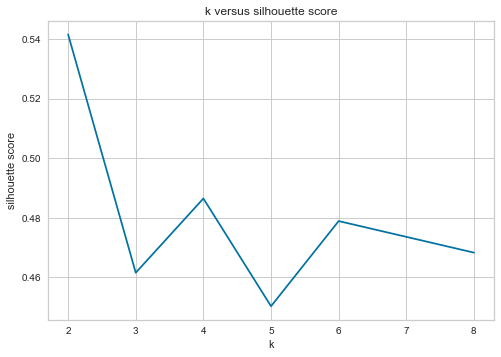

In [166]:
plt.plot([2, 3, 4, 5, 6, 8], silhouetteScore)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('k versus silhouette score')

Q 2.5 - <span style="color:red">[5]</span> - According to the plots of **Question 2.3** and **Question 2.4** select 4 values for k and generate Silhouette Diagrams for them.  

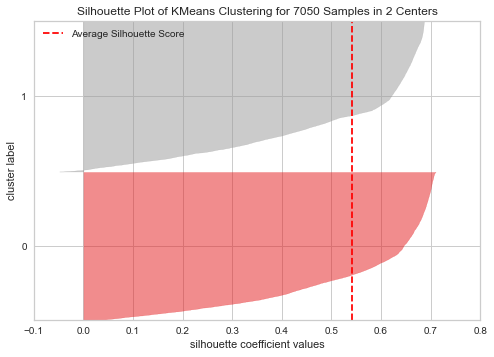

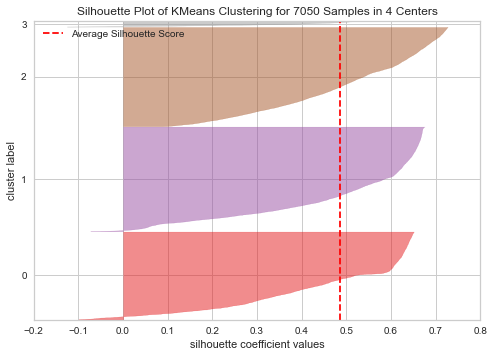

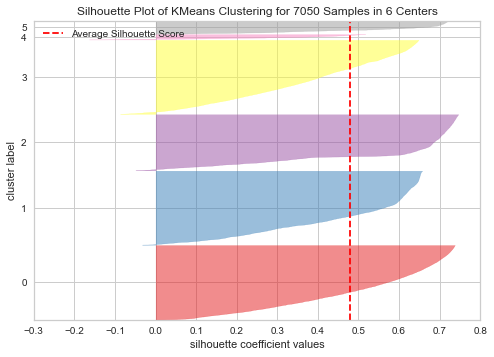

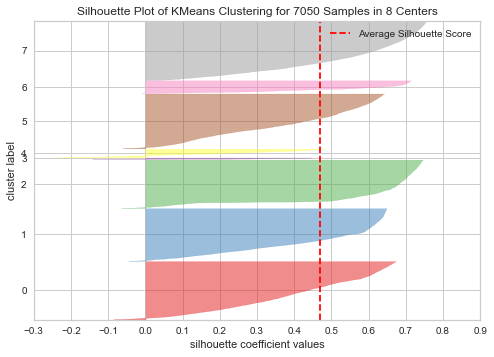

In [167]:
# I will select k = 2, 4, 6 and 8

for k in [2, 4, 6, 8]:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(X)
  visualizer.show()
  plt.show()

In [168]:
kmeans_2 = KMeans(n_clusters=2, random_state=seed)
kmeans_4 = KMeans(n_clusters=4, random_state=seed)
kmeans_6 = KMeans(n_clusters=6, random_state=seed)
kmeans_8 = KMeans(n_clusters=8, random_state=seed)

kmeans_2_label = kmeans_2.fit_predict(X)
kmeans_4_label = kmeans_4.fit_predict(X)
kmeans_6_label = kmeans_6.fit_predict(X)
kmeans_8_label = kmeans_8.fit_predict(X)

def acc_kmeans(label):
    counter = 0
    for (index, label) in enumerate(label):
        if (label == true_label[index]):
            counter += 1

    return counter

In [169]:
print("k= 2 : ", acc_kmeans(kmeans_2_label))
print("k= 4 : ", acc_kmeans(kmeans_4_label))
print("k= 6 : ", acc_kmeans(kmeans_6_label))
print("k= 8 : ", acc_kmeans(kmeans_8_label))

k= 2 :  1746
k= 4 :  1537
k= 6 :  1957
k= 8 :  918


I'll choose k = 2 and 6, since they both have a realtive high silhouette score, almost all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

In [170]:
scaler = StandardScaler()
data = scaler.fit_transform(X)

clusterer = KMeans(n_clusters=2, random_state=seed)
cluster_labels = clusterer.fit_predict(data)

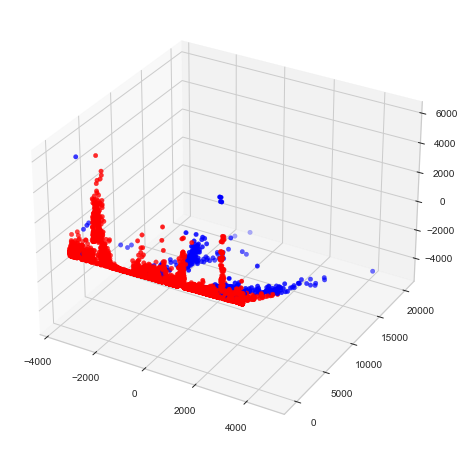

In [171]:
pca = PCA(n_components=3)
pca.fit(X)
transformed_data = pca.transform(X)

c = []
for label in cluster_labels:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')
    elif label == 3: c.append('orange')
    else:
        c.append('black')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed_data[:,0], transformed_data[:,1], transformed_data[:,2], c = c)

Q 2.9 - <span style="color:red">[3]</span> - Retrain the `KMeans` with number of clusters being equal to your second choice for k, and again apply a PCA transform to the data using 3 components and create a 3D scatter plot, differentiating data points by color.

Note: If you do not know how to plot in 3D, do 2D for partial mark.

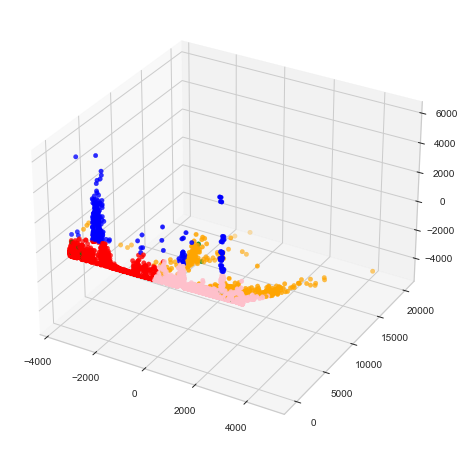

In [172]:
scaler = StandardScaler()
data = scaler.fit_transform(X)

clusterer = KMeans(n_clusters=6, random_state=seed)
cluster_labels = clusterer.fit_predict(data)

pca = PCA(n_components=3)
pca.fit(X)
transformed_data = pca.transform(X)

c = []
for label in cluster_labels:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')
    elif label == 3: c.append('orange')
    elif label == 4: c.append('orange')
    elif label == 5: c.append('pink')
    else:    
        c.append('black')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed_data[:,0], transformed_data[:,1], transformed_data[:,2], c = c)

Q 2.10 - <span style="color:red">[1]</span> - After seeing the figures generated in **Question 2.8** and **2.9**, what value of **k** would be your ultimate choice? Explain. 

I will use k = 2 since it has a better split the data from each other after we apply the StandardScaler.

---
## Question 3 - <span style="color:green">[10 Bonus]</span> - ANN
Let's use the same dataset as **Question 1** to train an ANN to predict players values. You can use either PyTorch or TensorFlow.  

Q 3.1 - <span style="color:red">[2]</span> - Load `dataset_1.csv` as a pandas dataframe, create the array of features `X` and target `y`. Use `train_test_split` with `random_state=seed,test_size=0.3` twice to get not only a training set and a test set but also a validation set. Use `StandardScaler()` to transform X's.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset_1.csv")
scaler = StandardScaler()


/Users/dongpochen/opt/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
seed = 1220
data = pd.get_dummies(df, drop_first=True)
X =  data.drop('Value', axis= 1)
y = data.Value.values
X = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=seed)

In [4]:
Xtrain.shape

(3432, 996)

Q 3.2 - <span style="color:red">[3]</span> - Create an ANN with 4 layers:
-   An input layer with 500 nodes
-   A hidden layer with 100 nodes
-   Another hidden layer with 50 nodes
-   A single node output layer

It is up to you where and what type of activation function to use.

How many parameters your ANN must optimize?


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(996, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        out = F.relu(out)
        out = self.fc4(out)
        return out

net = Net()

Q 3.3 - <span style="color:red">[3]</span> - Choose `mean_squared_error` for loss and train the model (with `epochs=20`) over training and validation sets.

In [6]:
Xtrain = Xtrain.astype(np.float32)
ytrain = ytrain.astype(np.float32)

In [7]:
Xtrain = torch.tensor(Xtrain)
ytrain = torch.tensor(ytrain)

: 

: 

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):
    optimizer.zero_grad()
    out = net(Xtrain)
    loss = criterion(out, ytrain)
    loss.backward()
    print('Epoch: %d, loss: %.5f' % (epoch, loss))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3432x500 and 100x50)

Q 3.4 - <span style="color:red">[1]</span> - Report both prediction and generalization loss of the model.

Q 3.5 - <span style="color:red">[1]</span> - Plot the learning curve *i.e.*, epoch vs training loss and validation loss.

---
# Warning!

Upload your complete notebook to the same place on OWL where you initially downloaded it. After uploading, click the "Submit for Grading" button and confirm. Late submissions are not allowed, so please start the submission process 10 minutes before the deadline.